C2 의 센터를 찾는다.

In [17]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from tqdm import tqdm

from PIL import Image, ImageOps


In [18]:
DATA_DIR = "/Volumes/SSD970/"
# DATA_DIR = "/root/autodl-tmp/cervical_spine/"
SAGITTAL_LABEL_DIR = os.path.join(DATA_DIR, "train_sagittal_labels_jpeg95/")

In [19]:
LABEL_SCALE=32

In [20]:
def read_png_image(path):
    img = Image.open(path)
    return np.asarray(img)

In [21]:
def get_PatientUID(UID):
    return "1.2.826.0.1.3680043." + str(UID)

In [22]:
def read_sagittal_labels(UID, label_scale=256, image_size=256):
    PatientUID = get_PatientUID(UID)
    label_dir = os.path.join(SAGITTAL_LABEL_DIR, PatientUID)

    image_paths = glob.glob(label_dir + "/**")
    image_paths.sort(key=lambda x: int(x.split("/")[-1].replace(".png","")))

    imgs = np.zeros((len(image_paths), image_size, image_size))
    for i, path in enumerate(image_paths):
       np_img = read_png_image(path)
       imgs[i] = np_img

    return imgs / label_scale

# imgs = read_sagittal_labels(9236, LABEL_SCALE)
# print(imgs.max())
# imgs.shape

In [23]:
def pick_spine(imgs, spine=2):
    spine_imgs = np.copy(imgs)
    spine_imgs[spine_imgs != (spine * 0.125)] = 0
    return spine_imgs

In [24]:
def find_center_slice(imgs):
    height, row, column = imgs.nonzero()
    sorted_indice = row.argsort()
    center_pos = sorted_indice[:100].mean()
    return height[int(center_pos)]



## Final method

(335, 256, 256)


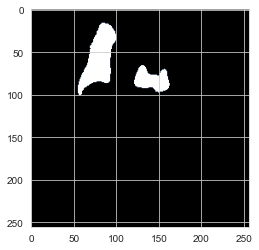

In [28]:
def find_spine_center(UID, spine, label_scale=256):
    imgs = read_sagittal_labels(UID, label_scale)
    print(imgs.shape)
    imgs = pick_spine(imgs, spine)
    center = find_center_slice(imgs)
    return center, imgs[center, :, :]

center, img = find_spine_center(10051, 2, label_scale=32)
plt.imshow(img, cmap='bone')


In [25]:
header = [
    "UID", "sagittal_center_slice", "label_scale"
]

f = open('sagittal_center_slice.csv','a',newline='')
writer = csv.writer(f)

writer.writerow(header)

In [ ]:
sagittal_label_dirs = glob.glob(SAGITTAL_LABEL_DIR + '/**')
label_scale = 256
for label_dir in sagittal_label_dirs:
    UID = label_dir.split(".")[-1]
    center, _ = find_spine_center(UID, 2, label_scale)
    writer.writerow([UID, center, label_scale])


In [ ]:
f.close()